# Social Network Analysis - Exercise Sheet 1
* Submit your code zipped via [moodle](https://moodle.uni-kassel.de/course/view.php?id=11038) until 01.06.2025 23:55 MEZ
* Use the [NetworkX](https://networkx.github.io/documentation/stable/) library.
* Below the Implementation section is a Test section with three degree sequences that can be used to check your code.

## Exercise 1a: Generation of Graphs for given Degree Sequences
In the following we present two slightly different algorithms;
one constructs a graph with a *sparse core*, the other constructs a graph with a *dense core*.
We assume that the sum of all degrees is more than $2(n-1)$ where n is the number of nodes.

For both algorithms we need a subroutine called `connectivity`. This subroutine first of all checks whether the constructed graph is connected. 
If the graph $G$ is not connected, it finds a connected component that contains a cycle. A cycle is a walk of length at least 3 where the starting and end point coincide and the corresponding sequence of traversed edges consists only of pairwise different edges.
Such a connected component must exist because of the assumption on the degrees made above.
Let $uv$ be an edge in the cycle, and $st$ be an edge in another connected component.
We now delete edges $uv$ and $st$, and insert edges $us$ and $vt$ to the network. 

*Sparse Core.*
In this section we describe an algorithm that constructs a graph with a given degree sequence that additionally is sparse. 
We are given a degree sequence $d_1 \geq d_2 \geq \cdots \geq d_n$, and we assign the vertices $v_1, v_2,\ldots,v_n$ to those degrees.
As long as there exists a vertex $v_i$ with $d_i>0$, we choose the vertex $v_l$ with the currently lowest degree $d_l$.
Then we insert $d_l$ edges from $v_l$ to the first $d_l$ vertices with the highest degree.
After that we update the residual vertex degrees $d_i = d_i-1$ for $i=1,\ldots,d_l$ and $d_l=0$.
Last, but not least, we have to check connectivity and, if necessary, establish it using the above-mentioned method `connectivity`.

*Dense Core.*
To construct a graph with a dense core for a certain degree sequence, we only have to change the above algorithm for sparse cores slightly.
As long as there exists a vertex $v_i$ with $d_i>0$ we now select such a vertex randomly and insert edges from $v_i$ to the $d_i$ vertices with the highest residual degrees.
After that we only have to update the residual degrees and establish connectivity if it is not given.

Read the above text and implement the three methods `connectivity`, `sparse_core` and `dense_core` accordingly.

### Implementation

Implement your solution in this section.
Use the predefined methods.
You can add more methods if you want.

If you do not want to use the NetworkX library add a method to extract the degree sequence from your graph.

In [9]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter


def connectivity(graph):
    """
    Takes a graph as input, if the graph is not connected
    it connects the graphs components and returns a connected graph.
    """

    components = list(nx.connected_components(graph))
    
    if len(components) == 1:
        return graph

    component_without_cycle = set([i for i in range(len(components))])
    all_cycles_at_least_three = []
    
    for i, comp in enumerate(components):
        
        subgraph = graph.subgraph(comp)
        
        try:
            
            cycle_nodes = [edge[0] for edge in nx.find_cycle(subgraph, orientation='original')]
            
            if len(cycle_nodes) >= 3:
                all_cycles_at_least_three.append((cycle_nodes[0], cycle_nodes[1]))
                component_without_cycle.remove(i)
                
        except nx.NetworkXNoCycle:
            pass

    

    # assumes one hasas many non-cyclic components as cyclic, not sure if this assumtion can be made

    for i, comp in enumerate(list(component_without_cycle)):

    
        s, t = list(components[comp])[:2]
        u, v = all_cycles_at_least_three[i]
        graph.remove_edges_from([(s, t),(u, v)])
        graph.add_edges_from([(u, s),(v, t)])

    return graph


def sparse_core(degree_sequence):
    """
    Generates a connected sparse core graph for a given degree sequence.

    Parameters
    ----------
    degree_sequence : list of int


    Returns
    -------
    graph
    """
    G = nx.Graph()

    ds = {k:degree_sequence[k] for k in range(len(degree_sequence))}  # vertex_index:degree
    
    while ds:

        lowest = min(ds, key=ds.get)
        lowest_degree = ds[lowest]
        del ds[lowest]  # remove, since degree is zero after adding |degree| neighbors
        highest = (dict(Counter(ds).most_common(lowest_degree))).keys()  # non deterministic
        # highest = [v for v, _ in sorted(ds.items(), key=lambda x: (-x[1], x[0]))][:lowest_degree]

        G.add_edges_from([(lowest, h) for h in highest])

        # decrease degrees for added edges, and remove if degree is zero
        for k in highest:
            ds[k] -= 1
            if ds[k] == 0:
                del ds[k]
        

    G = connectivity(G)
    return G



def dense_core(degree_sequence):
    """
    Generates a connected dense core graph for a given degree sequence.

    Parameters
    ----------
    degree_sequence : list of int


    Returns
    -------
    graph
    """
    G = nx.Graph()
    
    random.seed(0)  # 0 for only one component; 11 for case with two
    
    ds = {k:degree_sequence[k] for k in range(len(degree_sequence))}  # vertex_index:degree
    
    while ds:

        random_vertex = random.choice(list(ds.keys()))
        random_degree = ds[random_vertex]
        del ds[random_vertex]  # remove, since degree is zero after adding |degree| neighbors
        highest = (dict(Counter(ds).most_common(random_degree))).keys()  # non deterministic
        # highest = [v for v, _ in sorted(ds.items(), key=lambda x: (-x[1], x[0]))][:random_degree]
            
        G.add_edges_from([(random_vertex, h) for h in highest])

        # decrease degrees for added edges, and remove if degree is zero
        for k in highest:
            ds[k] -= 1
            if ds[k] == 0:
                del ds[k]

    G = connectivity(G)
    return G

### Tests
This section contains three degree sequences that can be used to test if the implemented methods generate graphs with the correct degree sequence.
Further it contains code to draw the graphs and inspect them visually.

dense core :



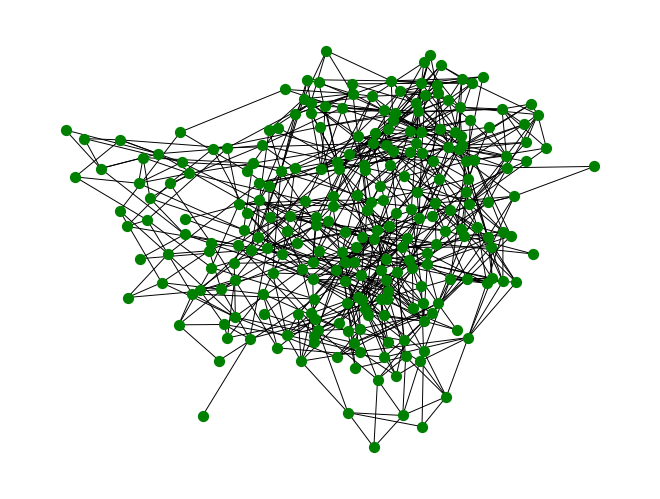

sparse_core:



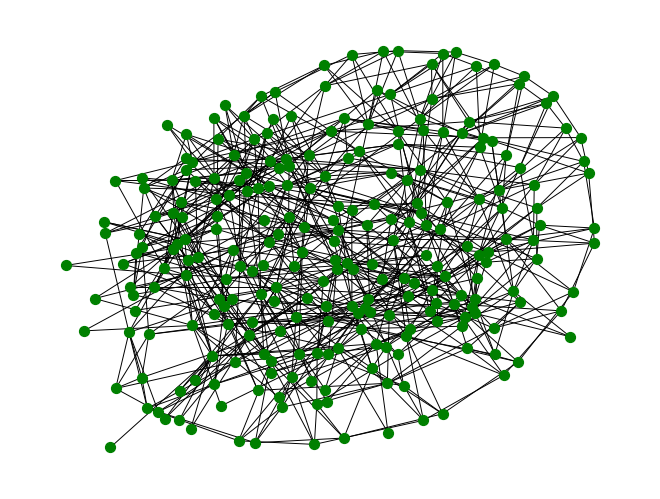

dense core :



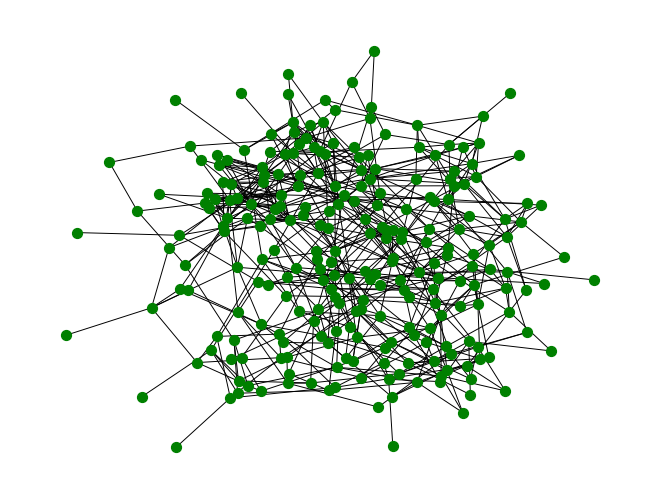

sparse_core:



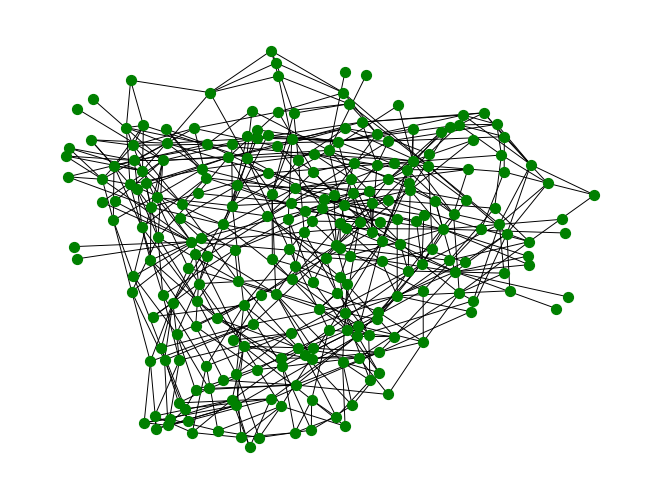

dense core :



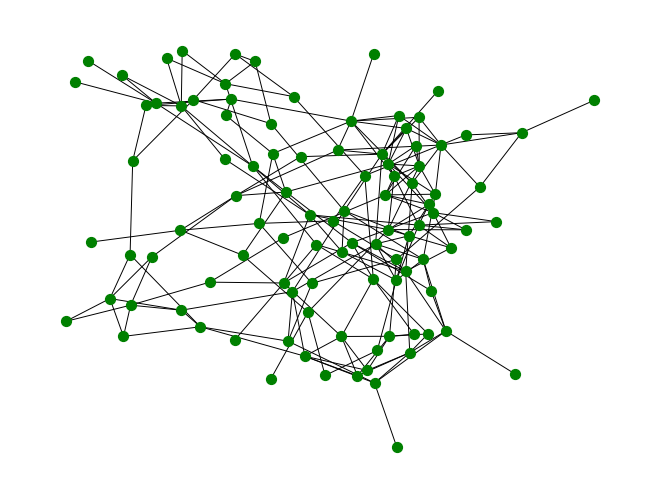

sparse_core:



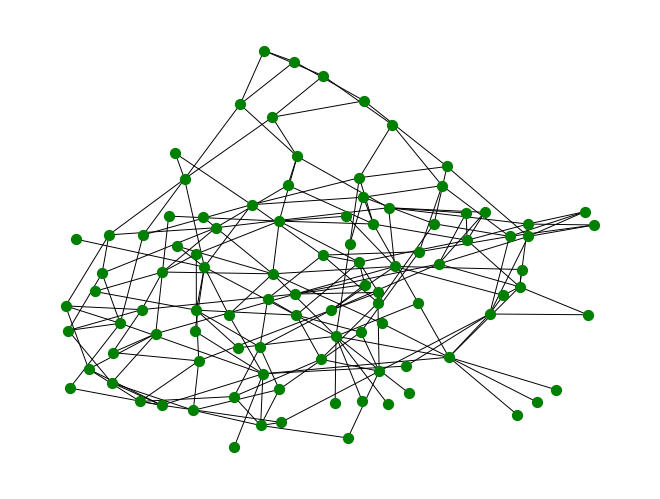

In [10]:
degree_sequences = [
    [
        14,
        12,
        11,
        11,
        11,
        11,
        11,
        11,
        11,
        10,
        10,
        10,
        10,
        10,
        10,
        10,
        10,
        10,
        10,
        9,
        9,
        9,
        9,
        9,
        9,
        9,
        9,
        9,
        9,
        9,
        9,
        9,
        9,
        9,
        9,
        9,
        9,
        9,
        9,
        9,
        9,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        1,
    ],
    [
        11,
        11,
        11,
        11,
        11,
        10,
        10,
        10,
        9,
        9,
        9,
        9,
        9,
        9,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        8,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        7,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
    ],
    [
        10,
        9,
        8,
        8,
        8,
        7,
        7,
        7,
        7,
        7,
        7,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        6,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        5,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        4,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        3,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
    ],
]

for dseq in degree_sequences:
    
    print("dense core :\n")
    G = dense_core(dseq)
    degree_sequence = sorted([v for n, v in nx.degree(G)], reverse=True)
    assert degree_sequence == dseq
    nx.draw(G, node_color="g", node_size=50, width=0.7)
    plt.draw()
    plt.show()

    print("sparse_core:\n")
    G = sparse_core(dseq)
    degree_sequence = sorted([v for n, v in nx.degree(G)], reverse=True)
    assert degree_sequence == dseq
    nx.draw(G, node_color="g", node_size=50, width=0.7)
    plt.draw()
    plt.show()

## Exercise 1b: Computation of all maximal Cliques for undirected Graphs
In graph theory cliques, i.e., subsets of the graph such that every two distinct vertices are adjacent, are one of the basic concepts of interest.
The concept has found a lot of applications throughout different disciplines.
For example in social network analysis cliques are used to analyze and model communities and in electrical engineering to analyze the topology of communication networks.
Further there are a lot of applications in bioinformatics and computational chemistry.
A directly connected task is the finding of cliques.
This so called clique problem is computationally hard.
Nonetheless a multitude of algorithms have been developed.
In 1977 Tsukiyama et. al. showed that it is possible to compute all maximal cliques where the amount of time per generated clique is polynomial.

Your Task is to implement their algorithm.
* Implement the above algorithm and test your implementation with the graphs given below.
* The pseudocode only lists (i.e. prints) the maximal cliques, change the algorithm to return a set containing the maximal cliques.
* Comment your code properly.
* Use Testcase 1 to perform a visual inspection of your results
* Use Testcase 4 to measure the time your implementation needs on different subsets of the [Euroroad](http://konect.uni-koblenz.de/networks/subelj_euroroad) network (graph is provided in the zip file). As a reference: Your implementation should compute the maximal cliques of the biggest subgraph (300 nodes) in under 400 seconds when timing the computation using the cProfile library.



### Implementation
Implement your solution in this section.
Use the predefined methods.
You can add more methods if you want.

In [11]:
import random
import networkx as nx
import matplotlib.pyplot as plt


def all_maximal_cliques(undirected_graph):
    """
    Input: undirected Graph
    Output: set containing all maximal
    """

    global c

    # assumes nodes are consecutive integer!!!
    nodes, cliques, c  = sorted(undirected_graph.nodes), [], set()
    neighborhoods = {n: set(undirected_graph.neighbors(n)) for n in undirected_graph.nodes()}

    def maximal(k, i):
        # is K maximal clique in G[1...i]
        
        for j in nodes[:i]:  # G[1...i]
            if j not in k and k.issubset(neighborhoods[j]):
                
                return False
                
        return True

    def parent(k, i):
        # lexicographical first maximal clique in G[1...i-1] that contains K-i
        
        p = k - {i}
        
        for j in nodes[:i - 1]:
            if p.issubset(neighborhoods[j]):
                
                p.add(j)
                
        return p

    def insert(i):

        global c
        
        if i == nodes[-1] + 1:
            cliques.append(c.copy())
            return

        if c.issubset(neighborhoods[i]):
            
            # only child
            c.add(i)
            insert(i + 1)
            c.remove(i)
            
        else:
            
            # left child
            insert(i + 1)

            # right child
            k = c.intersection(neighborhoods[i])
            k.add(i)
            
            if maximal(k, i) and c == parent(k, i):
                
                c = k.copy()
                insert(i + 1)
                c = parent(c, i).copy()
                
    
    insert(nodes[0])
    return cliques

### Tests 
This section contains four testcases that can be used to test if the implemented methods correctly compute the maximal cliques.
Further it contains code to draw the graphs and inspect them visually given the NetworkX library was used.

In [12]:
def inspect_cliques_visually(G, plotall=False):
    nx.draw(G, node_color="lightblue", with_labels=True)
    plt.show()
    max_cliques = all_maximal_cliques(G)
    print("maximal cliques:", *[set(c) for c in max_cliques])
    if plotall:
        for clique in max_cliques:
            val_map = {c: "yellow" for c in clique}
            values = [val_map.get(node, "lightblue") for node in G.nodes()]
            nx.draw(G, node_color=values, with_labels=True)
            plt.show()

Maximal Cliques: [[4, 1, 2, 3], [4, 5], [6, 5, 7]]


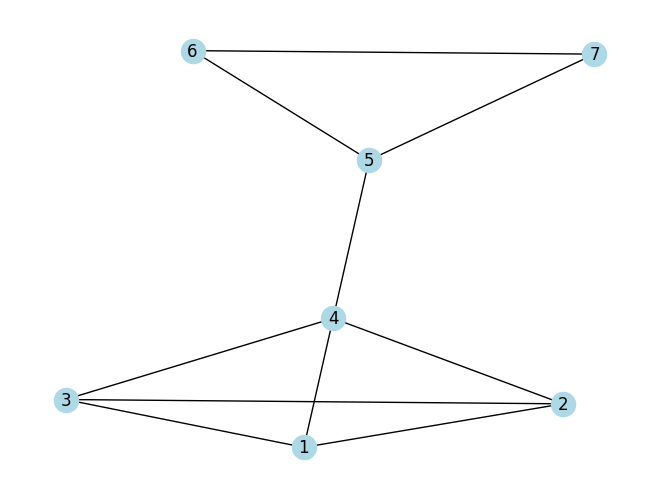

maximal cliques: {1, 2, 3, 4} {4, 5} {5, 6, 7}


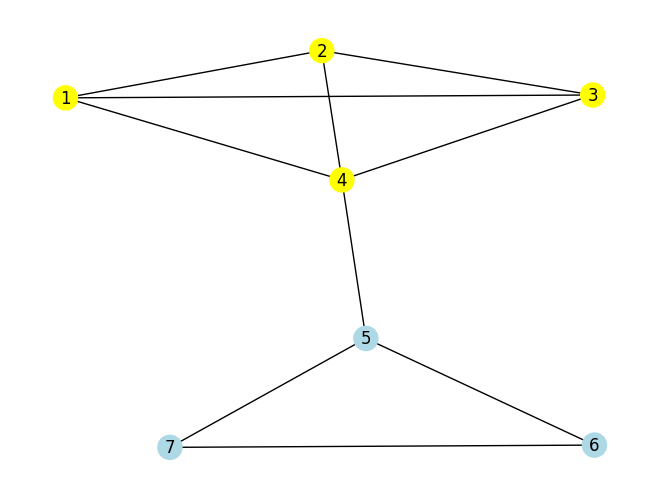

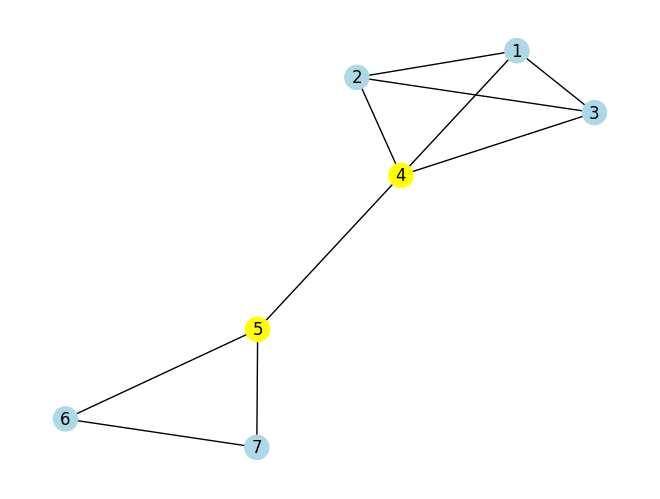

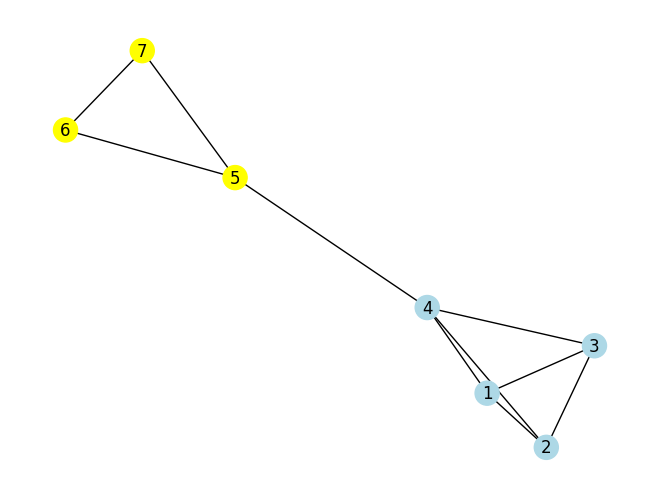

In [13]:
# Testcase 1
G1 = nx.Graph()
G1.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
G1.add_edges_from(
    [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (4, 5), (5, 6), (5, 7), (6, 7)]
)
max_cliques = list(nx.find_cliques(G1))
print("Maximal Cliques:", max_cliques)
inspect_cliques_visually(G1, plotall=True)

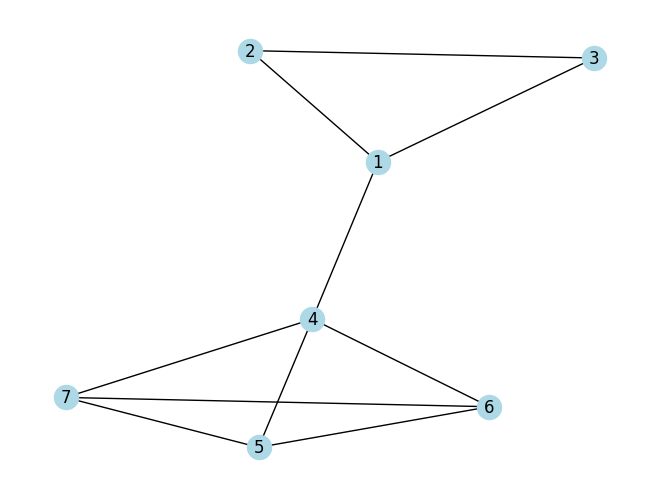

maximal cliques: {1, 2, 3} {1, 4} {4, 5, 6, 7}


In [14]:
# Testcase 2
G2 = nx.Graph()
G2.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
G2.add_edges_from(
    [(1, 2), (1, 3), (1, 4), (2, 3), (4, 5), (4, 6), (4, 7), (5, 6), (5, 7), (6, 7)]
)
inspect_cliques_visually(G2)

In [15]:
# Testcase 3
G3 = nx.read_gml("./resources/adjnoun.gml", label="id")
all_maximal_cliques(G3)

[{0, 1, 2},
 {2, 111},
 {2, 97},
 {1, 91},
 {1, 46},
 {1, 2, 45},
 {2, 45, 73},
 {73, 103},
 {73, 76},
 {45, 52},
 {1, 2, 41},
 {2, 41, 42},
 {2, 23, 51},
 {2, 23, 105},
 {23, 69},
 {23, 51, 59},
 {23, 47},
 {47, 48},
 {23, 43, 59},
 {43, 59, 70},
 {1, 19},
 {19, 27},
 {19, 26},
 {19, 25},
 {19, 24},
 {19, 23},
 {19, 22},
 {19, 21},
 {19, 20},
 {20, 108},
 {20, 94},
 {20, 79},
 {20, 43},
 {1, 18, 51},
 {18, 60},
 {18, 34, 51, 54},
 {18, 29},
 {29, 79},
 {29, 74},
 {29, 58},
 {18, 21, 43},
 {18, 21, 50, 51},
 {18, 50, 51, 54},
 {1, 2, 14, 17},
 {2, 14, 105},
 {105, 108},
 {14, 17, 37},
 {14, 37, 59},
 {37, 59, 72},
 {2, 14, 17, 36},
 {36, 55},
 {2, 14, 17, 25},
 {14, 25, 59},
 {14, 59, 71},
 {71, 73},
 {13, 14, 16},
 {14, 16, 68},
 {68, 84},
 {68, 73},
 {13, 18},
 {2, 11, 98},
 {2, 11, 104},
 {2, 104, 105},
 {11, 69},
 {11, 63},
 {63, 65},
 {63, 64},
 {11, 40},
 {1, 2, 9, 17},
 {1, 2, 17, 102},
 {2, 17, 98},
 {2, 17, 93},
 {9, 17, 89},
 {17, 85},
 {2, 17, 83},
 {17, 83, 87},
 {17, 82},


In [16]:
# Testcase 4
G4 = nx.read_adjlist(
    "./resources/out.subelj_euroroad_euroroad", comments="%", nodetype=int
)
G4_sub1 = G4.subgraph(range(1, 100))
G4_sub2 = G4.subgraph(range(1, 200))
G4_sub3 = G4.subgraph(range(1, 300))
import cProfile

cProfile.run("all_maximal_cliques(G4_sub1)")
cProfile.run("all_maximal_cliques(G4_sub2)")
cProfile.run("all_maximal_cliques(G4_sub3)")

         367174 function calls (362359 primitive calls) in 0.062 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     4708    0.028    0.000    0.047    0.000 1817249432.py:18(maximal)
      599    0.003    0.000    0.006    0.000 1817249432.py:28(parent)
   4815/1    0.007    0.000    0.060    0.060 1817249432.py:40(insert)
        1    0.000    0.000    0.060    0.060 1817249432.py:6(all_maximal_cliques)
        1    0.000    0.000    0.060    0.060 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 base_events.py:734(time)
        1    0.000    0.000    0.000    0.000 contextlib.py:141(__exit__)
       99    0.000    0.000    0.000    0.000 coreviews.py:280(__init__)
        1    0.000    0.000    0.000    0.000 coreviews.py:284(__len__)
      101    0.000    0.000    0.000    0.000 coreviews.py:293(__iter__)
      200    0.000    0.000    0.000    0.000 coreviews.py:299(<genexpr>)
      295    0.000    0